# Multitaper spectral analysis


### Issue

Neural data are non-stationary, while many common time-series analyses assume stationarity. Analyzing short time windows (within which stationarity may hold) provides one solution to this issue, however, this method introduces both bias and variance in the spectral estimation.

### Solution

The multitaper method was designed to address the issues of bias and variance in spectral estimation. This method leverages multiple orthogonol tapers known as discrete prolate spheroidal sequences (dpss) or Slepian sequences. These tapers are designed to optimize the trade-off between narrowband and broadband bias. Furthermore, by averaging mulitple spectral estimates for each time window, the variance of the estimation is reduced. 

### Related Work

The following papers include discussion of this topic:

- [A Review of Multitaper Spectral Analysis](https://pubmed.ncbi.nlm.nih.gov/24759284/), Babadi and Brown, 2014
- [Comparison of spectral analysis methods for characterizing brain oscillations](https://pubmed.ncbi.nlm.nih.gov/17292478/), van Vugt et al., 2007
- [Spectrum Estimation and Harmonic Analysis](https://ieeexplore.ieee.org/document/1456701), Thompson, 1982

### Related Discussion / Examples

The following examples discuss related topics:
-  Mike X Cohen covers multitapers in Chapter 16 of Analyzing Neural Time Series Data: [book](https://direct.mit.edu/books/book/4013/Analyzing-Neural-Time-Series-DataTheory-and), [lecture](https://mikexcohen.com/lecturelets/multitaper/multitaper.html), [associated matlab code](https://github.com/mikexcohen/AnalyzingNeuralTimeSeries/blob/main/chapter16.m), [python translation](https://github.com/lyndond/Analyzing_Neural_Time_Series/blob/master/notebooks/chapter16.ipynb)

In [1]:
# Imports
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from neurodsp.utils import create_times, set_random_seed
from mne.time_frequency import tfr_array_multitaper
from scipy.signal.windows import dpss

In [2]:
# Add path and import custom code for the project
import sys
sys.path.append('code')

### Settings

In [3]:
# import seaborn as sns
# sns.set_context('poster')

In [4]:
# Set random seed
set_random_seed(808)

In [5]:
# Set whether to save out figures
SAVE_FIG = False

### Load data and visualize

In [6]:
# load data

# We are setting the sampling frequency here. The data is sampled at 1000 Hz.
fs = 1000 

# Load the channel and the event indices.
fname = "../data/ecog_data.mat"
data_in = loadmat(fname)
sta = data_in['sta'].flatten() # Standard event
tar = data_in['tar'].flatten() # Target event
resp = data_in['resp'].flatten() # Response times
data = data_in['data'].flatten() # Neural data from one ECoG channel
n_seconds = len(data) / fs

# print details
print(f"N seconds: {n_seconds}")
print(f"N standard stimuli: {len(sta)}")
print(f"N target stimuli: {len(tar)}")
print(f"N response times: {len(resp)}")

N seconds: 1459.92
N standard stimuli: 380
N target stimuli: 117
N response times: 117


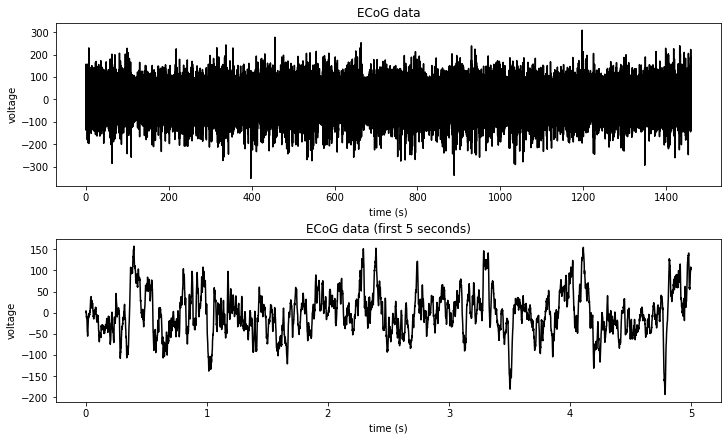

In [7]:
# visulatize time-series

# create time vector
time = create_times(n_seconds, fs)

# plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=[10,6], constrained_layout=True)
ax1.set_title("ECoG data")
ax1.plot(time, data, color='k') # plot all data
ax2.set_title("ECoG data (first 5 seconds)")
ax2.plot(time[:5*fs], data[:5*fs], color='k') # plot first 5 seconds
for ax in [ax1, ax2]:
    ax.set(xlabel="time (s)", ylabel="voltage")
plt.show()

### Compute multitaper

In [8]:
# apply multitaper method

# reshape data for MNE function
epoch_data = data.reshape(1, 1, -1)

# take first 60 seconds
epoch_data = epoch_data[:, :, :60*fs]
tfr_time = time[:60*fs]

# define frequencies of interst
freq = np.arange(1, 100, 1)

# compute
tfr = tfr_array_multitaper(epoch_data, sfreq=fs, freqs=freq, output='power')
tfr = tfr[0,0] # reshape

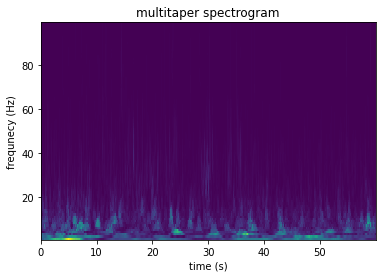

In [9]:
# plot results
fig, ax = plt.subplots(1,1, figsize=[6,4])
ax.pcolormesh(tfr_time, freq, tfr)
ax.set(xlabel="time (s)", ylabel="frequnecy (Hz)")
ax.set_title("multitaper spectrogram")
plt.show()

### DPSS windows

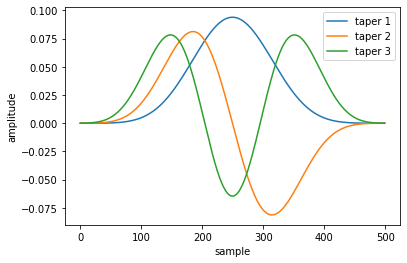

In [10]:
# define tapers

# define parameters
window_length = int(0.5 * fs) # in samples
half_bandwidth = 5 # in Hz
n_tapers = 3 # number of tapers

# compute tapers
tapers = dpss(window_length, half_bandwidth, Kmax=n_tapers)

# plot tapers
fig, ax = plt.subplots(1,1, figsize=[6,4])
for i_taper, taper in enumerate(tapers):
    ax.plot(taper, label=f"taper {i_taper+1}")
ax.set(xlabel="sample", ylabel="amplitude")
ax.legend()

### Compare to other time-resolved spectral estimation techniques (STFT and wavelet)

### Recommendations

### Conclusion

<>